In [1]:
import cv2

In [3]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

In [26]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
import numpy as np

<IPython.core.display.Javascript object>


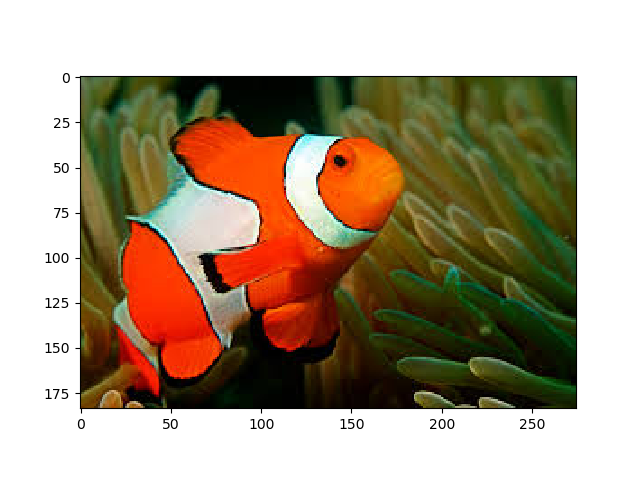

In [27]:
image = cv2.imread('./images/nemo0.jpg') # OpenCV by default reads the image as BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

#### HSV is a good choice of color space for segmenting by color
Lets see the color distribution of its pixels

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

<IPython.core.display.Javascript object>


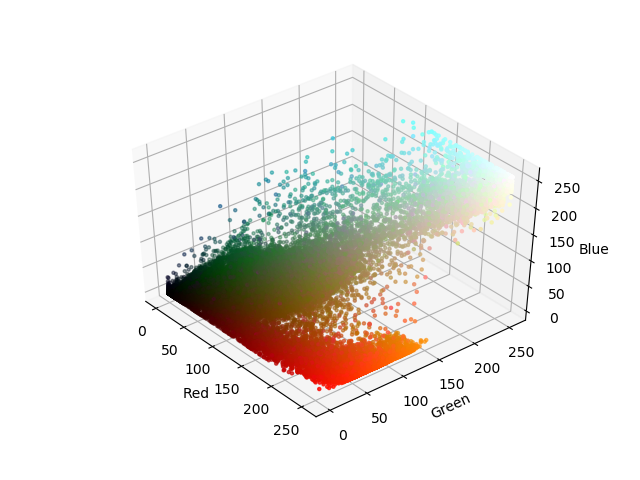

In [38]:
r,g,b = cv2.split(image)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

pixels_channels = image.reshape((image.shape[0]*image.shape[1], 3))
normalizer = colors.Normalize(vmin=-1.,vmax=1.)
normalizer.autoscale(pixels_channels)
pixels_colors =  normalizer(pixels_channels).tolist()

ax.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixels_colors, marker=".")
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()

<IPython.core.display.Javascript object>


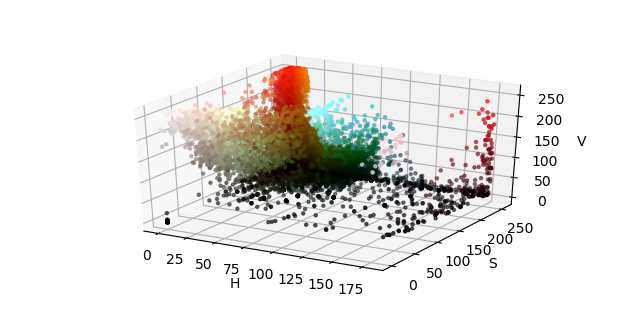

In [44]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

h,s,v = cv2.split(hsv_image)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixels_colors, marker=".")
ax.set_xlabel("H")
ax.set_ylabel("S")
ax.set_zlabel("V")
plt.show()

#### Nemo’s oranges are much more localized and visually separable.
value of the oranges do vary, but they are mostly located within a small range along the hue axis.
Choose a range of colors:

<IPython.core.display.Javascript object>


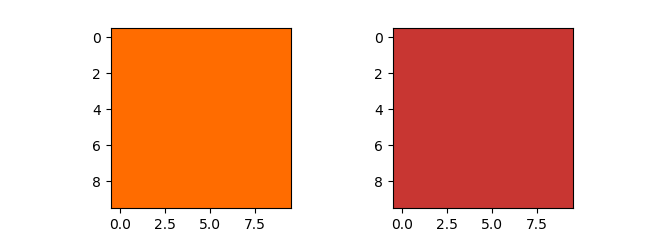

In [43]:
from matplotlib.colors import hsv_to_rgb

light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
fig2 = plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))

#### Using  cv2.inRange() to try to threshold the colors:

<IPython.core.display.Javascript object>


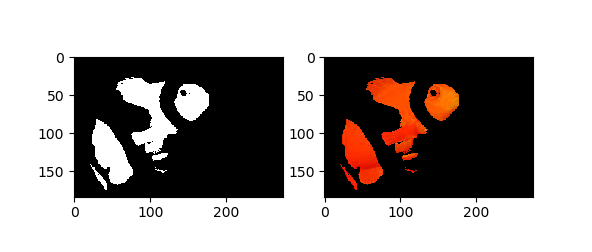

In [53]:
mask_orange= cv2.inRange(hsv_image, light_orange, dark_orange) # O means not in range 1 means in range
masked_image = cv2.bitwise_and(image, image, mask=mask_orange)
plt.figure()
plt.subplot(1,2, 1)
plt.imshow(mask_orange, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(masked_image)

#### Similarly for whites

<IPython.core.display.Javascript object>


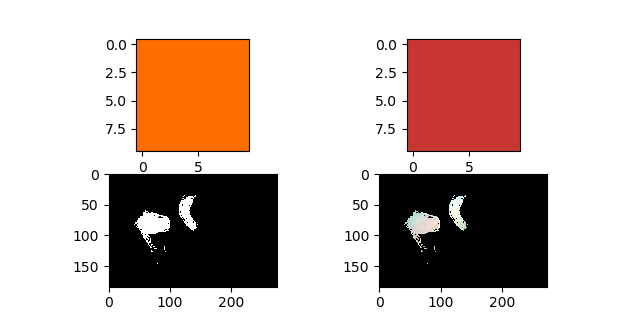

In [54]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0
fig2 = plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(2, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))

mask_white= cv2.inRange(hsv_image, light_white, dark_white) # O means not in range 1 means in range
masked_image = cv2.bitwise_and(image, image, mask=mask_white)
plt.subplot(2,2, 3)
plt.imshow(mask, cmap='gray')
plt.subplot(2,2,4)
plt.imshow(masked_image)

<IPython.core.display.Javascript object>


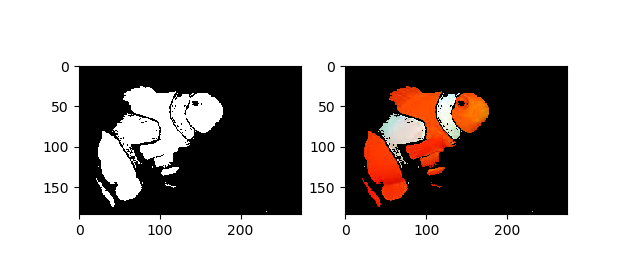

In [55]:
final_mask = mask_orange + mask_white

final_image = cv2.bitwise_and(image, image, mask=final_mask)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_image)
plt.show()

<IPython.core.display.Javascript object>


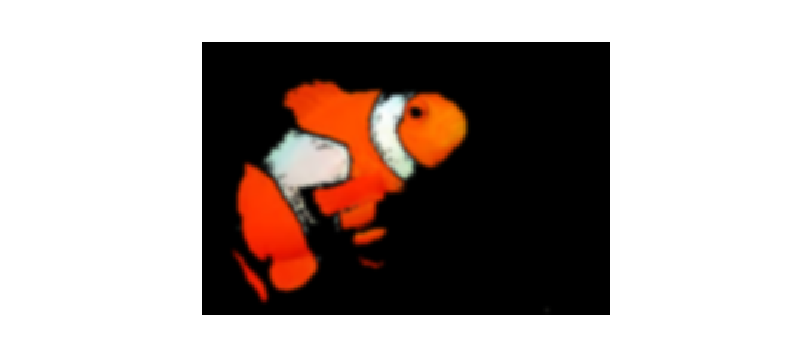

In [56]:
blurred = cv2.GaussianBlur(final_image, (7,7), 0)
plt.figure()
plt.imshow(blurred)

<IPython.core.display.Javascript object>


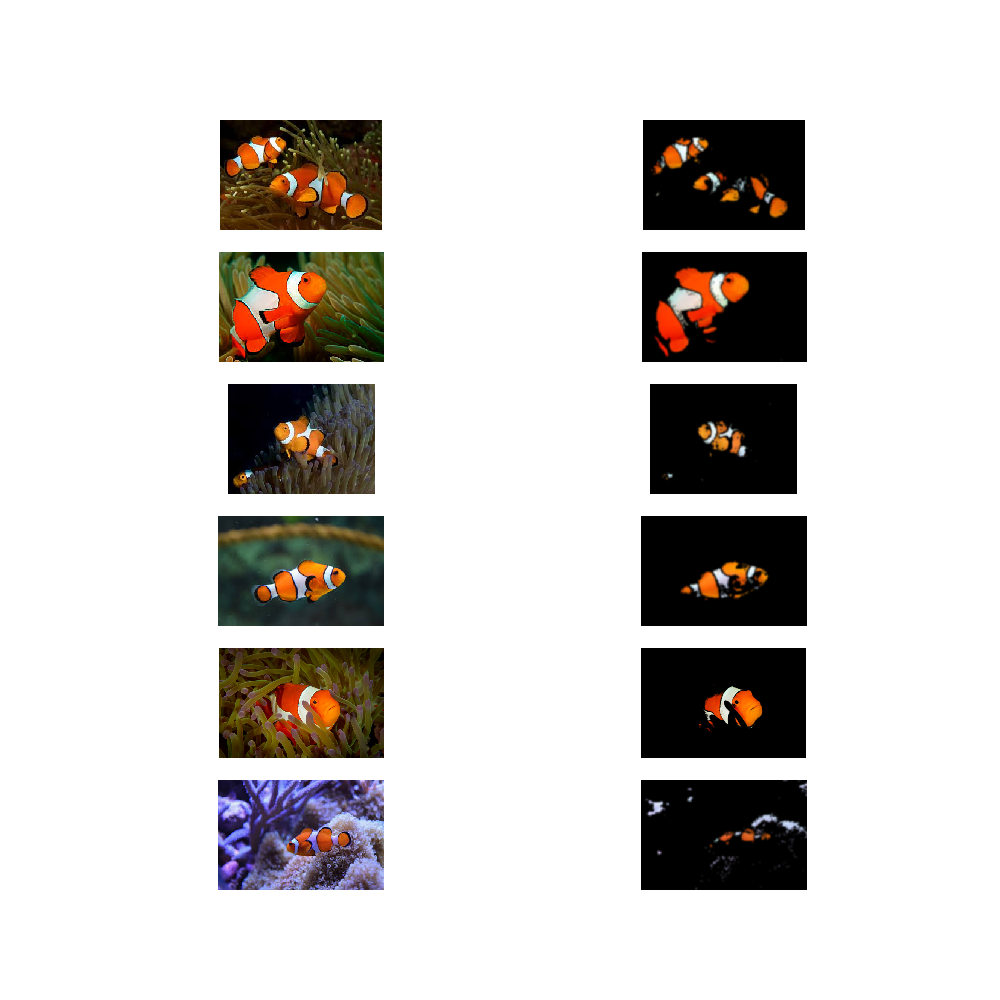

In [95]:
import os
import cv2
import glob
import numpy as np
from matplotlib.colors import hsv_to_rgb
import matplotlib.pyplot as plt

def Masking(image, color_ranges):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    final_mask = np.full(image.shape[:-1],0,dtype=np.uint8)
    for each_range in color_ranges:
        final_mask += cv2.inRange(hsv_image, each_range[0], each_range[1])
    final_image = cv2.bitwise_and(image, image, mask=final_mask)
    blurred_image = cv2.GaussianBlur(final_image, (7,7), 0)
    return blurred_image
    
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

color_ranges= np.array([[light_orange, dark_orange], 
                       [light_white, dark_white]])


path = os.path.join("./images/nemo*")
file_list = glob.glob(path)
file_list_len = len(file_list)
fig = plt.figure(figsize=(10,10))
images = list()
result_images = list()
plots = 1
for file in file_list:
    image = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
    result_image = Masking(image, color_ranges)
    plt.subplot(file_list_len, 2, plots)
    plt.axis('off')
    plt.imshow(image)
    plots+=1
    plt.subplot(file_list_len, 2, plots)
    plt.axis('off')
    plt.imshow(result_image)
    plots+=1
    images.append(image)
    result_images.append(result_image)
    
plt.show()